# Exercise 4
In a retail experiment, we want to understand how advertising expenditure, store location, and competition affect sales revenue. Using synthetic data, implement multiple linear regression in Python to analyse these factors. Interpret the coefficients, perform an F-test to assess overall model significance, and conduct t-tests to evaluate the significance of individual coefficients.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("sales.csv")


In [16]:
X = df[["AdvertisingExpenditure", "Competition", "StoreLocation"]]
Y = df["SalesRevenue"]

In [17]:
model = LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

model.fit(X_train, Y_train)

LinearRegression()

In [18]:
coefficients = model.coef_
intercept = model.intercept_
print(f"Coefficient = {coefficients}\nIntercept = {intercept}")

Coefficient = [2.11493691e+00 2.27274333e+03 2.19396228e+03]
Intercept = 3176.7913667305384


In [19]:
Y_pred = model.predict(X_test)

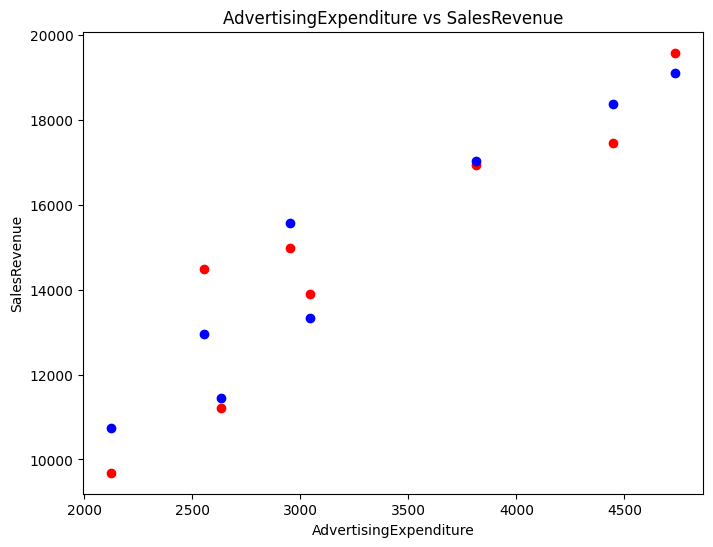

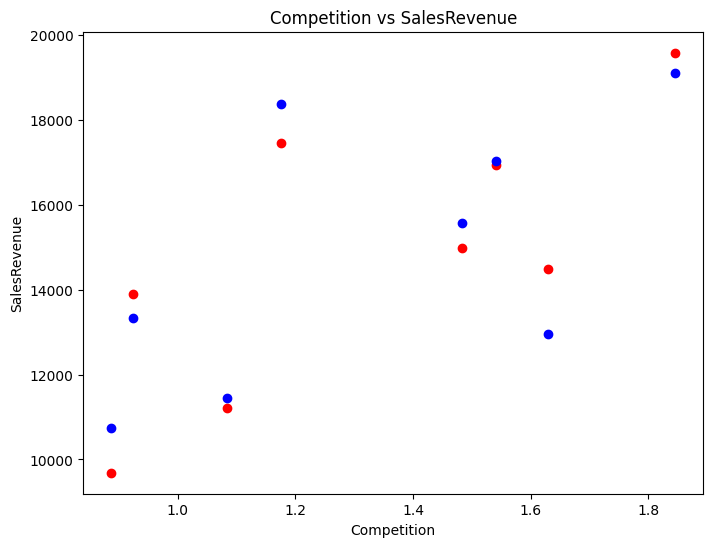

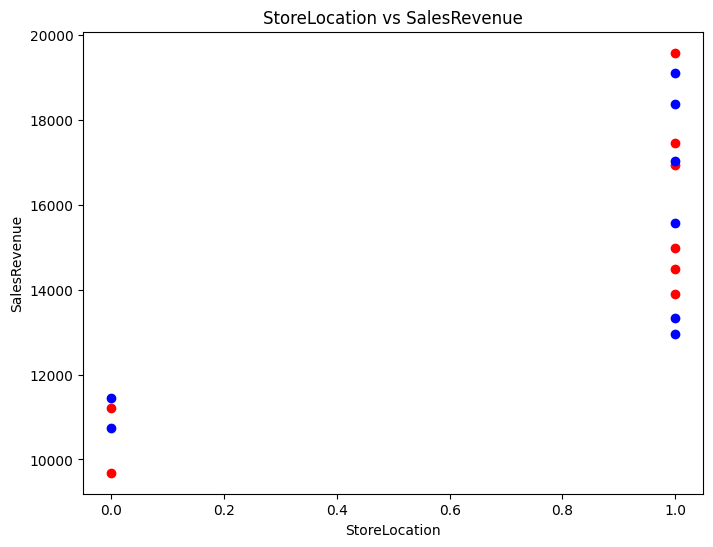

In [20]:
predictors = ["AdvertisingExpenditure", "Competition", "StoreLocation"]

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    plt.title(f"{predictor} vs SalesRevenue")
    plt.xlabel(predictor)
    plt.ylabel("SalesRevenue")
    plt.scatter(X_test[predictor], Y_pred, color="r", label="Predicted Data")
    plt.scatter(X_test[predictor], Y_test, color="b", label="Actual Data")

In [21]:
import statsmodels.api as sm

In [22]:
for predictor in predictors:
    X_with_const = sm.add_constant(X[predictor])
    model = sm.OLS(Y, X_with_const).fit()

    t_statistic = model.tvalues[predictor]
    p_value_t = model.pvalues[predictor]

    print(f"t-statistic for {predictor} = {t_statistic}")

    if p_value_t < 0.05:
        print(f"{predictor} is a statistically significant predictor of SalesRevenue.")
    else:
        print(f"{predictor} is NOT a statistically significant predictor of SalesRevenue.")


t-statistic for AdvertisingExpenditure = 13.11093645301257
AdvertisingExpenditure is a statistically significant predictor of SalesRevenue.
t-statistic for Competition = 1.5025797523366309
Competition is NOT a statistically significant predictor of SalesRevenue.
t-statistic for StoreLocation = 6.667755595029671
StoreLocation is a statistically significant predictor of SalesRevenue.


In [23]:
X_with_const = sm.add_constant(X[predictor])
model = sm.OLS(Y, X_with_const).fit()

f_statistic = model.fvalue
p_value_f = model.f_pvalue

print(f"F-statistic for {predictor} = {f_statistic}")

if p_value_f < 0.05:
    print(f"{predictor} is a statistically significant predictor of SalesRevenue.")
else:
    print(f"{predictor} is NOT a statistically significant predictor of SalesRevenue.")


F-statistic for StoreLocation = 44.458964675049536
StoreLocation is a statistically significant predictor of SalesRevenue.
